In [524]:
import pandas as pd
minute = pd.read_csv("05_K_bank_minute_label.csv",encoding = 'utf-8')

In [525]:
pos_df = pd.read_csv("07_total_dict_pos_2.csv",encoding = 'utf-8')
neg_df = pd.read_csv("07_total_dict_neg_2.csv",encoding = 'utf-8')

In [526]:
minute.drop(['Unnamed: 0'], axis='columns', inplace = True)

In [527]:
minute.head()

,date,content,ngram,section,old_date,callrate,old_callrate,updown
0,2005-07-07,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"들/VV,국제/NNG,유가/NNG,크/VA,오르/VV,원화/NNG,엔/NNG,화간/...",일부 위원은 6월 들어 국제유가가 크게 오르고 원화와 엔화간 동조화 현상이 뚜렷...,2005-06-07,3.03,3.20,down
1,2005-08-11,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"위안/NNG,절상/NNG,원화/NNG,절상/NNG,가장/MAG,크/VA,추가/NNG...",일부 위원은 위안화 절상 이후 아시아 통화중 우리나라 원화의 절상폭이 가장 컸다...,2005-07-12,3.26,3.21,up
2,2005-09-08,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"금융/NNG,불안사태/NNG,발생/NNG,하/VV,가운데/NNG,국제/NNG,환투기...",일부 위원은 최근 인도네시아 금융불안 사태가 발생한 가운데 국제 환투기세력이 인...,2005-08-09,3.24,3.26,down
3,2005-10-11,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"금리갭/NNG,확대/NNG,되/XSV,가운데/NNG,남/VV,fed/NNG,금리/N...",일부 위원은 미국과 우리나라의 정책금 리 격차가 확대되고 있는 가운데 금년 두 차...,2005-09-11,3.50,3.22,up
4,2005-11-10,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"미/NNG,달러/NNG,엔/NNG,약세/NNG,지속/NNG,되/VV,보/VV,물/V...","일부 위원은 미 달러화에 대한 엔화 약 세가 지속될 것으로 보는지 물었으며, 이에...",2005-10-11,3.49,3.50,down


In [528]:
pos_df.drop(['Unnamed: 0'], axis='columns', inplace = True)

In [529]:
neg_df.drop(['Unnamed: 0'], axis='columns', inplace = True)

In [530]:
pos_df.head()

,ngram,total_count,up_count,down_count,polar_score,polarity
0,인상/NNG,460593,258982.0,201611.0,1.382397,Hawkish
1,인플레이션/NNG,143338,78757.0,64581.0,1.312387,Hawkish
2,콜/NNG,51010,32331.0,18679.0,1.862700,Hawkish
3,긴축/NNG,41373,25307.0,16066.0,1.695158,Hawkish
4,증가율/NNG,33963,18664.0,15299.0,1.312862,Hawkish


In [531]:
pos_list = []
pos_list = pos_df['ngram']
pos_list = list(pos_list)

In [532]:
neg_list = []
neg_list = neg_df['ngram']
neg_list = list(neg_list)

In [533]:
# 문장 쪼개기
minute['section'][0]

'일부 위원은 6월 들어 국제유가가 크게   오르고 원화와 엔화간 동조화 현상이 뚜렷해지면서 고유가에 상대적으로 취약한   일본과 우리나라의 화폐가치가 약세를 시현하고 있어 당초 예상보다 장기간 환율  상승이 이어질 가능성은 없는지 물었으며, 이에 대해 관련부서에서는 고유가는 현  재 엔화와 원화 가치의 절하압력으로 작용하고 있으나 환율에 영향을 미치는 주  요 요인들의 비중이 시간이 지남에 따라 달라지고 있음을 감안할 때 고유가가 더   이상 원화 약세요인으로 작용하지 못할 가능성도 배제할 수 없다고 설명하였음.@@@다른 일부 위원은 최근 원/달러 환율의 급등 요인으로서 비거주자의 차액결  제선물환(NDF) 매입이 단기간에 크게 늘고 국내은행의 외환매입세가 가세하게 된   이유를 물었으며, 이에 대해 관련부서에서는 비거주자의 NDF 매입 급증은 일정   범위를 정해놓고 이를 넘어설 경우 자동적으로 매매시스템을 가동시키는 모델펀  드에 의해 촉발되었으며 글로벌 헤지펀드들이 거래에서 이익을 얻을 수 있다는   판단 하에 매입에 나선 데다 국내 역외펀드들의 국내 주식투자자금 헤지를 위한   수요에도 기인하며, 국내은행들의 매입세 가세는 수출대금 네고는 미루고(lag) 수  입 결제자금 환전은 앞당기는(lead) 무역업체들의 결제행태가 반영되는 한편 은행  들이 환율상승을 예상하여 외환매입초과 포지션(long position)을 유지하고 있는 데   기인한다고 설명하였음.@@@동 위원은 6월중 자본 순유출규모가 전월에 비해 다소 축소되었으나 항목  별로 볼 때 해외증권투자는 증가세를 지속하여 상반기 누계액이 전년동기 실적을     - 5 -  크게 상회하고 있다면서 하반기에도 해외증권투자의 증가세가 지속될 것으로 보  는지 물었으며, 이에 대해 관련부서에서는 한국은행이 외환보유액 활용 차원에서   실시하고 있는 금융기관과의 외화대출 연계 통화스왑 등에 따라 해외증권투자는   늘어날 것으로 예상된다고 답변하였음.@@@또 다른 일부 위원은 국제투자은행들이 하반기에 내외

In [534]:
#문장으로 쪼개기
import re
def tidy_sentences(section):
    sentence_enders = re.compile(r'((?<=[함음됨임봄짐움])(\s*\n|\.|;)|(?<=다)\.)\s*') #문장으로 쪼개기
    splits = list((m.start(), m.end()) for m in re.finditer(sentence_enders, section))
    starts = [0] + [i[1] for i in splits]
    ends = [i[0] for i in splits]
    sentences = [section[start:end] for start, end in zip(starts[:-1], ends)]
    for i, s in enumerate(sentences): #문장으로 먼저 쪼개고 그 다음 개행 제거
        sentences[i] = (s.replace('\n', ' ').replace(' ', ' ')) + '.'

    text = '\n'.join(sentences) if len(sentences) > 0 else ''
    return sentences

In [535]:
M_list =[]
for i in range(len(minute)):
    M = tidy_sentences(minute['section'][i])
    M_list.append(M)

In [536]:
minute['문장쪼개기']=""

In [537]:
minute['문장쪼개기'] = M_list

In [538]:
#문장별 토큰화
import pandas as pd
from ekonlpy.sentiment import MPCK

def text2ngram(text) :
    mpck = MPCK()
    tokens = mpck.tokenize(text)
    ngrams = mpck.ngramize(tokens)
                
    return tokens+ngrams 

In [539]:
doc = []
for i in range(len(minute)):
    N_list = []
    print(i)
    for j in range(len(minute['문장쪼개기'][i])):
        
        N = text2ngram(minute['문장쪼개기'][i][j])
        N_list.append(N)
        
    doc.append(N_list)
            
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


In [540]:
minute.head(1)

,date,content,ngram,section,old_date,callrate,old_callrate,updown,문장쪼개기
0,2005-07-07,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"들/VV,국제/NNG,유가/NNG,크/VA,오르/VV,원화/NNG,엔/NNG,화간/...",일부 위원은 6월 들어 국제유가가 크게 오르고 원화와 엔화간 동조화 현상이 뚜렷...,2005-06-07,3.03,3.2,down,[일부 위원은 6월 들어 국제유가가 크게 오르고 원화와 엔화간 동조화 현상이 뚜...


In [541]:
minute.to_csv("08_문장별토큰화.csv",encoding = 'utf-8')

In [1]:
import pandas as pd
dff = pd.read_csv("08_문장별토큰화.csv",encoding = 'utf-8')

In [4]:
dff['문장쪼개기'][0]

"['일부 위원은 6월 들어 국제유가가 크게   오르고 원화와 엔화간 동조화 현상이 뚜렷해지면서 고유가에 상대적으로 취약한   일본과 우리나라의 화폐가치가 약세를 시현하고 있어 당초 예상보다 장기간 환율  상승이 이어질 가능성은 없는지 물었으며, 이에 대해 관련부서에서는 고유가는 현  재 엔화와 원화 가치의 절하압력으로 작용하고 있으나 환율에 영향을 미치는 주  요 요인들의 비중이 시간이 지남에 따라 달라지고 있음을 감안할 때 고유가가 더   이상 원화 약세요인으로 작용하지 못할 가능성도 배제할 수 없다고 설명하였음.', '@@@다른 일부 위원은 최근 원/달러 환율의 급등 요인으로서 비거주자의 차액결  제선물환(NDF) 매입이 단기간에 크게 늘고 국내은행의 외환매입세가 가세하게 된   이유를 물었으며, 이에 대해 관련부서에서는 비거주자의 NDF 매입 급증은 일정   범위를 정해놓고 이를 넘어설 경우 자동적으로 매매시스템을 가동시키는 모델펀  드에 의해 촉발되었으며 글로벌 헤지펀드들이 거래에서 이익을 얻을 수 있다는   판단 하에 매입에 나선 데다 국내 역외펀드들의 국내 주식투자자금 헤지를 위한   수요에도 기인하며, 국내은행들의 매입세 가세는 수출대금 네고는 미루고(lag) 수  입 결제자금 환전은 앞당기는(lead) 무역업체들의 결제행태가 반영되는 한편 은행  들이 환율상승을 예상하여 외환매입초과 포지션(long position)을 유지하고 있는 데   기인한다고 설명하였음.', '@@@동 위원은 6월중 자본 순유출규모가 전월에 비해 다소 축소되었으나 항목  별로 볼 때 해외증권투자는 증가세를 지속하여 상반기 누계액이 전년동기 실적을     - 5 -  크게 상회하고 있다면서 하반기에도 해외증권투자의 증가세가 지속될 것으로 보  는지 물었으며, 이에 대해 관련부서에서는 한국은행이 외환보유액 활용 차원에서   실시하고 있는 금융기관과의 외화대출 연계 통화스왑 등에 따라 해외증권투자는   늘어날 것으로 예상된다고 답변하였음.', '@@@또 다른 일부 위원은 국제

In [542]:
minute['문장별토큰화'] = ""
minute['문장별토큰화'] = doc

In [543]:
len(minute['문장쪼개기'][0])

165

In [544]:
doc_list = []
for i in range(len(minute)):
    print(i)
    tone_s_list = []
    for j in range(len(minute['문장별토큰화'][i])):
        pos_count = 0
        neg_count = 0
        for k in range(len(minute['문장별토큰화'][i][j])):
            if minute['문장별토큰화'][i][j][k] in pos_list:
                pos_count +=1
            if minute['문장별토큰화'][i][j][k] in neg_list:
                neg_count +=1
        try: 
            tone_s = (pos_count - neg_count)/(pos_count + neg_count)
            tone_s_list.append(tone_s)
        except:
            pass
    doc_list.append(tone_s_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


In [545]:
minute.head(1)

,date,content,ngram,section,old_date,callrate,old_callrate,updown,문장쪼개기,문장별토큰화
0,2005-07-07,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"들/VV,국제/NNG,유가/NNG,크/VA,오르/VV,원화/NNG,엔/NNG,화간/...",일부 위원은 6월 들어 국제유가가 크게 오르고 원화와 엔화간 동조화 현상이 뚜렷...,2005-06-07,3.03,3.2,down,[일부 위원은 6월 들어 국제유가가 크게 오르고 원화와 엔화간 동조화 현상이 뚜...,"[[들/VV, 국제/NNG, 유가/NNG, 크/VA, 오르/VV, 원화/NNG, 엔..."


In [546]:
minute['tone_s']=""

In [547]:
minute['tone_s']=doc_list

In [548]:
minute.to_csv("08_tone_s.csv",encoding = 'utf-8')


In [5]:
import pandas as pd
dff = pd.read_csv("08_tone_s.csv",encoding = 'utf-8')

In [9]:
dff['문장별토큰화'][0]

"[['들/VV', '국제/NNG', '유가/NNG', '크/VA', '오르/VV', '원화/NNG', '엔/NNG', '화간/NNG', '동조/NNG', '현상/NNG', '뚜렷/NNG', '해지/NNG', '고유가/NNG', '상대적/VAX', '취약/NNG', '화폐/NNG', '가격/NNG', '약세/NNG', '시현/NNG', '하/XSV', '예상/NNG', '장기간/NNG', '환율/NNG', '상승/NNG', '이어지/VV', '가능성/NNG', '없/VA', '물/VV', '대해/VV', '고유가/NNG', '엔/NNG', '원화/NNG', '절하/NNG', '압력/NNG', '작용/NNG', '하/XSV', '환율/NNG', '영향/NNG', '미치/VV', '주/NNG', '요인/NNG', '비중/NNG', '지남/VV', '달라지/VV', '감안/NNG', '하/VV', '때/NNG', '고유가/NNG', '더이상/MAG', '원화/NNG', '약세/NNG', '요인/NNG', '작용/NNG', '하/XSV', '못하/VX', '가능성/NNG', '배제/NNG', '하/VV', '없/VA', '설명/NNG', '하/XSV', '원화/NNG;절하/NNG;압력/NNG', '가격/NNG;약세/NNG', '원화/NNG;약세/NNG'], ['원달러/NNG', '급등/NNG', '요인/NNG', '비거주자/NNG', '차액결제선물환/NNG', '매입/NNG', '단기간/NNG', '크/VA', '늘/VV', '외환/NNG', '매입세/NNG', '가세/NNG', '하/XSV', '되/VV', '이유/NNG', '물/VV', '대해/VV', '비거주자/NNG', '매입/NNG', '급증/NNG', '범위/NNG', '정하/VV', '넘/VV', '자동/NNG', '매매/NNG', '시스템/NNG', '가동/NNG', '시키/XSV', '모델/NNG', '펀드/NNG', '의하/VV', '촉발/NNG', '되/XSV', '글로벌/NNG', '헤지펀드/N

In [549]:
label = []
for i in range(len(minute)):
    tmp = []
    print(i)
    for j in range(len(doc_list[i])):
        if doc_list[i][j]>0:
            tmp.append('hawk')
        elif doc_list[i][j]<0:
            tmp.append('dove')
        else:
            pass
    label.append(tmp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


In [550]:
len(label[0])

96

In [551]:
minute['tone_s_label']=""

In [552]:
minute['tone_s_label']=label

In [553]:
minute.to_csv("08_tone_s.csv",encoding = 'utf-8')

In [554]:
from collections import Counter

In [555]:
re = []
for i in range(len(minute)):
    re.append(Counter(minute['tone_s_label'][i]))
se = []
real_label = [ ] 
for j in range(len(minute)):
    A = (re[j]['hawk']-re[j]['dove'])/(re[j]['hawk']+re[j]['dove'])
     if A>0:
         real_label.append('hawk')
     elif A<0:
         real_label.append('dove')
     else:
         pass
    se.append(A)

In [556]:
minute['tone_d']=""
minute['real_label']=""

In [557]:
minute['tone_d']=se
minute['real_label']=real_label

In [558]:
minute

,date,content,ngram,section,old_date,callrate,old_callrate,updown,문장쪼개기,문장별토큰화,tone_s,tone_s_label,tone_d
0,2005-07-07,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"들/VV,국제/NNG,유가/NNG,크/VA,오르/VV,원화/NNG,엔/NNG,화간/...",일부 위원은 6월 들어 국제유가가 크게 오르고 원화와 엔화간 동조화 현상이 뚜렷...,2005-06-07,3.03,3.20,down,[일부 위원은 6월 들어 국제유가가 크게 오르고 원화와 엔화간 동조화 현상이 뚜...,"[[들/VV, 국제/NNG, 유가/NNG, 크/VA, 오르/VV, 원화/NNG, 엔...","[0.2, -0.5, 1.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0....","[hawk, dove, hawk, dove, dove, hawk, hawk, haw...",0.520833
1,2005-08-11,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"위안/NNG,절상/NNG,원화/NNG,절상/NNG,가장/MAG,크/VA,추가/NNG...",일부 위원은 위안화 절상 이후 아시아 통화중 우리나라 원화의 절상폭이 가장 컸다...,2005-07-12,3.26,3.21,up,[일부 위원은 위안화 절상 이후 아시아 통화중 우리나라 원화의 절상폭이 가장 컸...,"[[위안/NNG, 절상/NNG, 원화/NNG, 절상/NNG, 가장/MAG, 크/VA...","[1.0, 1.0, 1.0, 1.0, 1.0, -0.2, 0.333333333333...","[hawk, hawk, hawk, hawk, hawk, dove, hawk, haw...",0.655172
2,2005-09-08,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"금융/NNG,불안사태/NNG,발생/NNG,하/VV,가운데/NNG,국제/NNG,환투기...",일부 위원은 최근 인도네시아 금융불안 사태가 발생한 가운데 국제 환투기세력이 인...,2005-08-09,3.24,3.26,down,[일부 위원은 최근 인도네시아 금융불안 사태가 발생한 가운데 국제 환투기세력이 ...,"[[금융/NNG, 불안사태/NNG, 발생/NNG, 가운데/NNG, 국제/NNG, 환...","[0.0, 1.0, 0.5555555555555556, 0.5, 0.33333333...","[hawk, hawk, hawk, hawk, dove, dove, dove, haw...",0.405405
3,2005-10-11,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"금리갭/NNG,확대/NNG,되/XSV,가운데/NNG,남/VV,fed/NNG,금리/N...",일부 위원은 미국과 우리나라의 정책금 리 격차가 확대되고 있는 가운데 금년 두 차...,2005-09-11,3.50,3.22,up,[일부 위원은 미국과 우리나라의 정책금 리 격차가 확대되고 있는 가운데 금년 두 ...,"[[금리갭/NNG, 확대/NNG, 되/XSV, 가운데/NNG, 남/VV, fed/N...","[1.0, 1.0, -1.0, -1.0, 0.42857142857142855, -1...","[hawk, hawk, dove, dove, hawk, dove, hawk, haw...",0.618182
4,2005-11-10,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"미/NNG,달러/NNG,엔/NNG,약세/NNG,지속/NNG,되/VV,보/VV,물/V...","일부 위원은 미 달러화에 대한 엔화 약 세가 지속될 것으로 보는지 물었으며, 이에...",2005-10-11,3.49,3.50,down,"[일부 위원은 미 달러화에 대한 엔화 약 세가 지속될 것으로 보는지 물었으며, 이...","[[미/NNG, 달러/NNG, 엔/NNG, 약세/NNG, 지속/NNG, 되/VV, ...","[1.0, -1.0, 1.0, 1.0, -0.3333333333333333, 0.3...","[hawk, dove, hawk, hawk, dove, hawk, hawk, haw...",0.636364
5,2005-12-08,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"들/VV,달러/NNG,엔/NNG,유로/NNG,대해/VV,상당히/MAG,강세/NNG,...",일부 위원은 금년 들어 달러화가 엔화 나 유로화에 대해 상당히 강세를 나타낸 것과...,2005-11-08,3.73,3.49,up,[일부 위원은 금년 들어 달러화가 엔화 나 유로화에 대해 상당히 강세를 나타낸 것...,"[[들/VV, 달러/NNG, 엔/NNG, 유로/NNG, 대해/VV, 상당히/MAG,...","[-0.5, 0.75, 1.0, 1.0, 0.5, 1.0, 0.0, 1.0, 1.0...","[dove, hawk, hawk, hawk, hawk, hawk, hawk, haw...",0.655172
6,2006-01-12,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"거의/MAG,예외/NNG,없/VA,원화/NNG,강세/NNG,현상/NNG,나타나/VV...",일부 위원은 2002년부터 거의 예외 없 이 연초에는 원화의 강세 현상이 나타나 ...,2005-12-13,3.74,3.74,neutrality,[일부 위원은 2002년부터 거의 예외 없 이 연초에는 원화의 강세 현상이 나타나...,"[[거의/MAG, 예외/NNG, 없/VA, 원화/NNG, 강세/NNG, 현상/NNG...","[0.5, 0.6666666666666666, 1.0, 0.4285714285714...","[hawk, hawk, hawk, hawk, hawk, hawk, dove, dov...",0.440678
7,2006-02-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"자본/NNG,유입/NNG,대해서/VV,관대/NNG,반면/NNG,자본/NNG,유출/N...",일부 위원은 자본유입에 대해서는 관대 한 반면 자본유출에 대해서는 비교적 엄격한 ...,2006-01-10,3.99,3.74,up,[일부 위원은 자본유입에 대해서는 관대 한 반면 자본유출에 대해서는 비교적 엄격한...,"[[자본/NNG, 유입/NNG, 대해서/VV, 관대/NNG, 반면/NNG, 자본/N...","[1.0, 1.0, -1.0, 0.8181818181818182, 1.0, 0.53...","[hawk, hawk, dove, hawk, hawk, hawk, hawk, haw...",0.792453
8,2006-03-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"사례/NNG,보/VV,원화/NNG,환율/NNG,엔/NNG,환율/NNG,위안/NNG,...",일부 위원은 과거 사례를 보면 원화환 율은 엔화환율 및 위안화환율과 높은 상관관계...,2006-02-07,3.98,3.68,up,[일부 위원은 과거 사례를 보면 원화환 율은 엔화환율 및 위안화환율과 높은 상관관...,"[[사례/NNG, 보/VV, 원화/NNG, 환율/NNG, 엔/NNG, 환율/NNG,...","[1.0, 1.0, 0.0, 0.5, 1.0, 1.0, 1.0, 0.63636363...","[hawk, hawk, hawk, hawk, hawk, hawk, hawk, haw...",0.777778
9,2006-04-07,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"환율/NNG,하락/NNG,수급/NNG,사정/NNG,변화/NNG,금리/NNG,변동/N...",일부 위원은 최근의 환율하락은 국내 수급사정의 변화 외에 시장참가자들의 정책금리...,2006-03-08,3.92,3.98,down,[일부 위원은 최근의 환율하락은 국내 수급사정의 변화 외에 시장참가자들의 정책금...,"[[환율/NNG, 하락/NNG, 수급/NNG, 

In [559]:

minute.to_csv("09_final_minute_through_text_NLP_2.csv",encoding = 'utf-8')

In [2]:
import pandas as pd
minute = pd.read_csv("09_final_minute_through_text_NLP_2.csv",encoding = 'utf-8')

In [3]:
minute = minute.sort_values('date')

In [5]:
rate = pd.read_csv("기준금리.csv",encoding = 'utf-8')

In [6]:
rate['date'] = pd.to_datetime(rate['date'])
minute['date'] = pd.to_datetime(minute['date'])


In [7]:
minute_2 = minute.copy()
minute_2.head()

,Unnamed: 0,date,content,ngram,section,old_date,callrate,old_callrate,updown,문장쪼개기,문장별토큰화,tone_s,tone_s_label,tone_d
0,0,2005-07-07,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"들/VV,국제/NNG,유가/NNG,크/VA,오르/VV,원화/NNG,엔/NNG,화간/...",일부 위원은 6월 들어 국제유가가 크게 오르고 원화와 엔화간 동조화 현상이 뚜렷...,2005-06-07,3.03,3.20,down,['일부 위원은 6월 들어 국제유가가 크게 오르고 원화와 엔화간 동조화 현상이 ...,"[['들/VV', '국제/NNG', '유가/NNG', '크/VA', '오르/VV',...","[0.2, -0.5, 1.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0....","['hawk', 'dove', 'hawk', 'dove', 'dove', 'hawk...",0.520833
1,1,2005-08-11,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"위안/NNG,절상/NNG,원화/NNG,절상/NNG,가장/MAG,크/VA,추가/NNG...",일부 위원은 위안화 절상 이후 아시아 통화중 우리나라 원화의 절상폭이 가장 컸다...,2005-07-12,3.26,3.21,up,['일부 위원은 위안화 절상 이후 아시아 통화중 우리나라 원화의 절상폭이 가장 ...,"[['위안/NNG', '절상/NNG', '원화/NNG', '절상/NNG', '가장/...","[1.0, 1.0, 1.0, 1.0, 1.0, -0.2, 0.333333333333...","['hawk', 'hawk', 'hawk', 'hawk', 'hawk', 'dove...",0.655172
2,2,2005-09-08,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"금융/NNG,불안사태/NNG,발생/NNG,하/VV,가운데/NNG,국제/NNG,환투기...",일부 위원은 최근 인도네시아 금융불안 사태가 발생한 가운데 국제 환투기세력이 인...,2005-08-09,3.24,3.26,down,['일부 위원은 최근 인도네시아 금융불안 사태가 발생한 가운데 국제 환투기세력이...,"[['금융/NNG', '불안사태/NNG', '발생/NNG', '가운데/NNG', '...","[0.0, 1.0, 0.5555555555555556, 0.5, 0.33333333...","['hawk', 'hawk', 'hawk', 'hawk', 'dove', 'dove...",0.405405
3,3,2005-10-11,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"금리갭/NNG,확대/NNG,되/XSV,가운데/NNG,남/VV,fed/NNG,금리/N...",일부 위원은 미국과 우리나라의 정책금 리 격차가 확대되고 있는 가운데 금년 두 차...,2005-09-11,3.50,3.22,up,['일부 위원은 미국과 우리나라의 정책금 리 격차가 확대되고 있는 가운데 금년 두...,"[['금리갭/NNG', '확대/NNG', '되/XSV', '가운데/NNG', '남/...","[1.0, 1.0, -1.0, -1.0, 0.42857142857142855, -1...","['hawk', 'hawk', 'dove', 'dove', 'hawk', 'dove...",0.618182
4,4,2005-11-10,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"미/NNG,달러/NNG,엔/NNG,약세/NNG,지속/NNG,되/VV,보/VV,물/V...","일부 위원은 미 달러화에 대한 엔화 약 세가 지속될 것으로 보는지 물었으며, 이에...",2005-10-11,3.49,3.50,down,"['일부 위원은 미 달러화에 대한 엔화 약 세가 지속될 것으로 보는지 물었으며, ...","[['미/NNG', '달러/NNG', '엔/NNG', '약세/NNG', '지속/NN...","[1.0, -1.0, 1.0, 1.0, -0.3333333333333333, 0.3...","['hawk', 'dove', 'hawk', 'hawk', 'dove', 'hawk...",0.636364


In [8]:
del minute_2['content']
del minute_2['ngram']
del minute_2['section']
del minute_2['old_date']
del minute_2['callrate']

In [9]:
del minute_2['old_callrate']
del minute_2['updown']
del minute_2['문장쪼개기']
del minute_2['문장별토큰화']
del minute_2['tone_s']
del minute_2['tone_s_label']

In [11]:
rate_df= rate.copy()

In [12]:
# 행삭제
rate_df = rate_df.drop([0,1,30,31,32,33,34,35,36,37,38,39,40,41])

In [13]:
rate_df = rate_df.reset_index()

In [14]:
rate_df['date'] = pd.to_datetime(rate_df['date'])
minute_2['date'] = pd.to_datetime(minute_2['date'])

In [15]:
import pandas as pd
polarity_score_rate_value = pd.merge(minute_2,rate_df,how = 'left', on = 'date')

In [16]:
del polarity_score_rate_value['index']

In [17]:
polarity_score_rate_value

,Unnamed: 0,date,tone_d,rate
0,0,2005-07-07,0.520833,NaN
1,1,2005-08-11,0.655172,NaN
2,2,2005-09-08,0.405405,NaN
3,3,2005-10-11,0.618182,3.50
4,4,2005-11-10,0.636364,NaN
5,5,2005-12-08,0.655172,3.75
6,6,2006-01-12,0.440678,NaN
7,7,2006-02-09,0.792453,4.00
8,8,2006-03-09,0.777778,NaN
9,9,2006-04-07,0.610619,NaN


In [18]:
polarity_score_rate_value

,Unnamed: 0,date,tone_d,rate
0,0,2005-07-07,0.520833,NaN
1,1,2005-08-11,0.655172,NaN
2,2,2005-09-08,0.405405,NaN
3,3,2005-10-11,0.618182,3.50
4,4,2005-11-10,0.636364,NaN
5,5,2005-12-08,0.655172,3.75
6,6,2006-01-12,0.440678,NaN
7,7,2006-02-09,0.792453,4.00
8,8,2006-03-09,0.777778,NaN
9,9,2006-04-07,0.610619,NaN


In [19]:
# 빈값 채워 넣기  : 앞에 값을 가져와 뒤에 넣기 
polarity_score_rate_value = polarity_score_rate_value.fillna(method = 'ffill')
if polarity_score_rate_value.isnull().values.any():
    polarity_score_rate_value = polarity_score_rate_value.fillna(method = 'bfill')

# 금통위 의사록 VS 한국은행 기준금리 상관계수

In [24]:
polarity_score_rate_value.corr(method = 'pearson')

,tone_d,rate
tone_d,1.000000,0.583885
rate,0.583885,1.000000


In [25]:
polarity_score_rate_value.to_csv('금리와_금통위의사록_상관관계_0.58')

In [22]:
del polarity_score_rate_value['Unnamed: 0']

# 금통위 의사록 VS 한국은행 기준금리  비교 

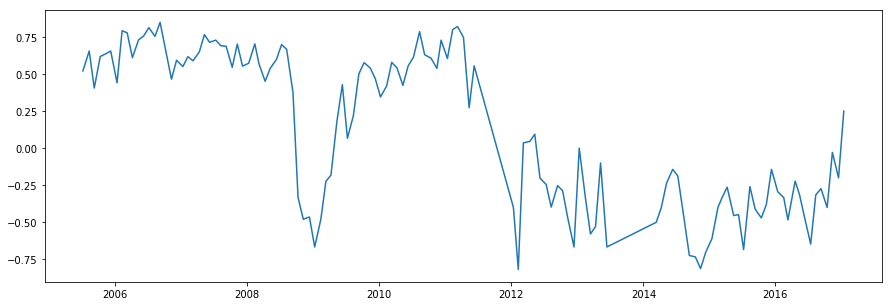

In [578]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 5))    
plt.plot(polarity_score_rate_value['date'],polarity_score_rate_value['tone_d'])


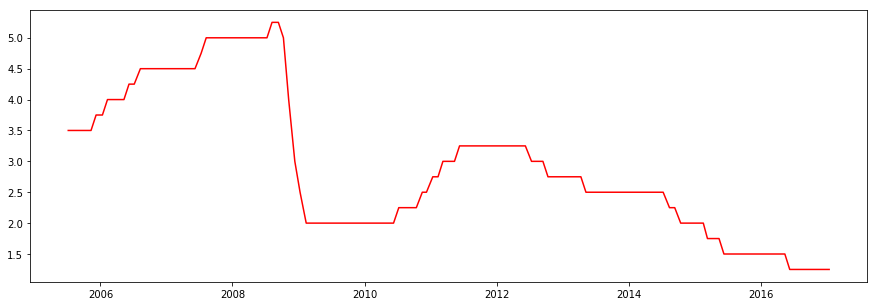

In [579]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 5))
plt.plot(polarity_score_rate_value['date'],polarity_score_rate_value['rate'],color = 'r')

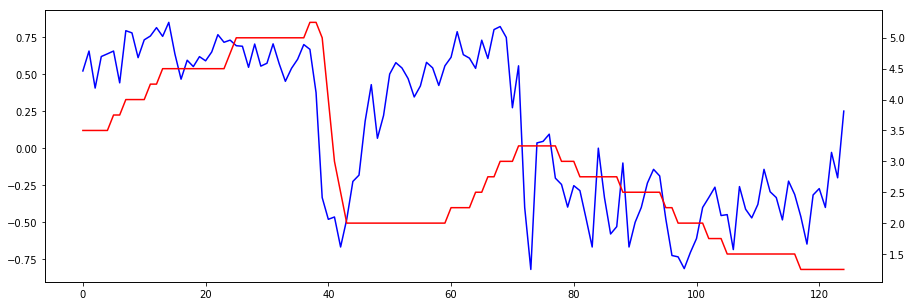

In [581]:
import numpy as np
import matplotlib.pyplot as plt 
fig,ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()

# plot with properties

line1 = ax1.plot(np.arange(len(polarity_score_rate_value['date'])),polarity_score_rate_value['tone_d'],color='b',linestyle='-')
line2 = ax2.plot(np.arange(len(polarity_score_rate_value['date'])),polarity_score_rate_value['rate'],color='r',linestyle='-')

plt.show()
fig.savefig('final_plt_2.png')